# Clasificación multiclase con redes neuronales en Keras
___

In [718]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow import keras
from keras.utils import to_categorical

In [719]:
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

## Importar Dataset

In [720]:
#https://keras.io/datasets/#fashion-mnist-database-of-fashion-articles

fashion_mnist = datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

## Explorar el dataset

#### Conjunto de entrenamiento

In [721]:
X_train_full.shape

(60000, 28, 28)

In [722]:
y_train_full.shape

(60000,)

#### Conjunto de prueba

In [723]:
X_test.shape

(10000, 28, 28)

In [724]:
y_test.shape

(10000,)

#### Visualizando una instancia

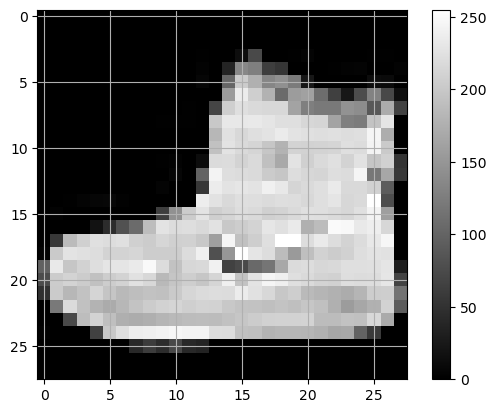

In [725]:
# Visualizar la imagen en escala de grises
plt.figure()
plt.imshow(X_train_full[0], cmap='gray')
plt.colorbar()
plt.grid(True)
plt.show()

#### Clases

In [726]:
y_train_full[0]

9

In [727]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                   "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [728]:
class_names[y_train_full[0]]

'Ankle boot'

#### Visualizando las primeras 25 instancias

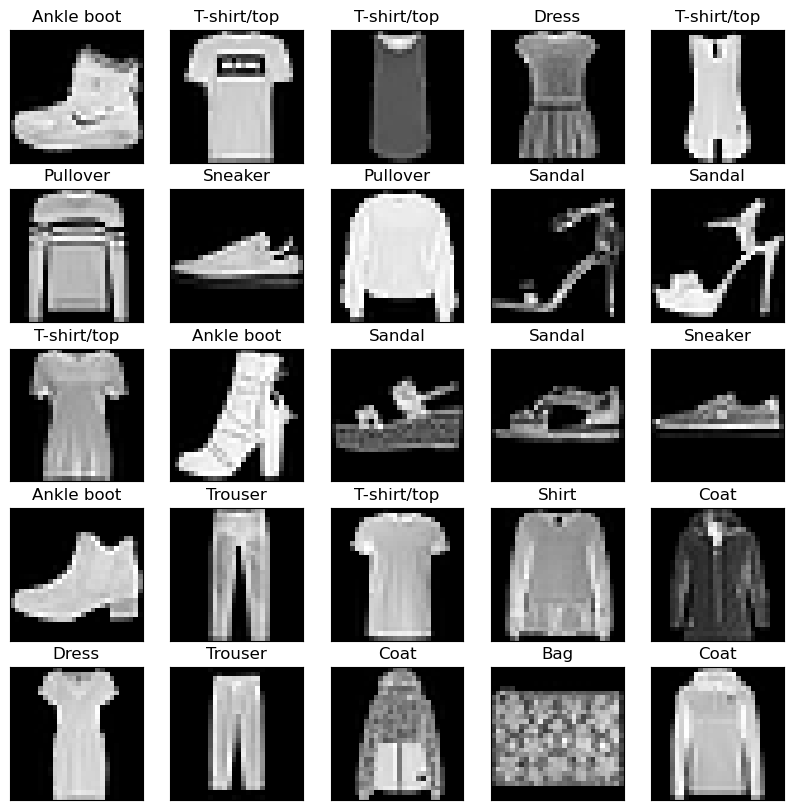

In [729]:
plt.figure(figsize=(10,10))
for i in range(0,25):
    plt.subplot(5,5, i+1)
    plt.imshow(X_train_full[i], cmap='gray')
    plt.title(class_names[(y_train_full[i])])
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
plt.show()

## Preprocesamiento

#### Escalamiento de características

In [730]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [731]:
X_train_full = X_train_full / 255
X_test = X_test / 255

In [732]:
X_train_full[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## Crear conjunto de validación

In [733]:
# Separar el conjunto de entrenamiento completo en validación y entrenamiento
X_train = X_train_full[:55000]
y_train = y_train_full[:55000]

X_validation = X_train_full[55000:]
y_validation = y_train_full[55000:]

In [734]:
X_validation.shape

(5000, 28, 28)

In [735]:
X_train.shape

(55000, 28, 28)

# Modelo

#### Crear el modelo y añadir capas

In [736]:
from tensorflow.keras import layers
from keras import models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization


model = keras.models.Sequential()

# filtro
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1) ))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(layers.Dropout(0.25))

# Clasificador
model.add(layers.Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(layers.Dense(10, activation='softmax'))

/opt/homebrew/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [737]:
model.summary()

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_48 (Conv2D)              │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_60          │ (None, 26, 26, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_87 (Dropout)            │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_49 (Conv2D)              │ (None, 11, 11, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_61          │ (None, 11, 11, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_88 (Dropout)            │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_50 (Conv2D)              │ (None, 3, 3, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_62          │ (None, 3, 3, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_89 (Dropout)            │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_26 (Flatten)            │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_90 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_91 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,618,570 (6.17 MB)

 Trainable params: 1,617,674 (6.17 MB)

 Non-trainable params: 896 (3.50 KB)

In [738]:
#keras.utils.plot_model(model)

In [739]:
model.layers

[<Conv2D name=conv2d_48, built=True>,
 <BatchNormalization name=batch_normalization_60, built=True>,
 <MaxPooling2D name=max_pooling2d_32, built=True>,
 <Dropout name=dropout_87, built=True>,
 <Conv2D name=conv2d_49, built=True>,
 <BatchNormalization name=batch_normalization_61, built=True>,
 <MaxPooling2D name=max_pooling2d_33, built=True>,
 <Dropout name=dropout_88, built=True>,
 <Conv2D name=conv2d_50, built=True>,
 <BatchNormalization name=batch_normalization_62, built=True>,
 <Dropout name=dropout_89, built=True>,
 <Flatten name=flatten_26, built=True>,
 <Dense name=dense_65, built=True>,
 <Dropout name=dropout_90, built=True>,
 <Dense name=dense_66, built=True>,
 <Dropout name=dropout_91, built=True>,
 <Dense name=dense_67, built=True>]

In [740]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
X_validation = X_validation.reshape((X_validation.shape[0], 28, 28, 1))

In [741]:
train_labels = to_categorical(y_train)
validation_labels = to_categorical(y_validation)
test_labels = to_categorical(y_test)

# Configurar el proceso de aprendizaje (Compilar)
Se especifica:
- Loss function
- Optimizer
- Metrics (Opcional, en caso de querer observar métricas extra durante el entrenamiento o evaluación)

In [742]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Entrenamiento y evaluación en datos de validación
Los datos de validación son opcionales, pero si los pasamos como parámetros en el método `fit()`, Keras medirá el loss y las demás métricas que le indiquemos sobre el conjunto de validación al final de cada época.

Se pueden pasar como parámetros los datos de validación con `validation_data`. Si se usa `validation_split`, la fracción de datos que indiquemos será usada como validación (se tomarán los datos del final del conjunto y no se usarán en el entrenamiento). `validation_data` sobrescribe `validation_split`.

- Si el performance es mucho mejor en el conjunto de entrenamiento que en el de validación hay ->

In [743]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', patience=5,  mode='min',  verbose=0, min_delta=0.0001)
checkpoint = keras.callbacks.ModelCheckpoint("best_model_FashionMnist_cnn.keras", monitor="accuracy", verbose=0, save_best_only=True, mode='max')

In [744]:
train_labels.shape

(55000, 10)

In [745]:
%%time
history = model.fit(X_train,
                    train_labels,
                    epochs=1000,
                    batch_size=128,
                    validation_data=(X_validation,validation_labels),
                    callbacks=[es,checkpoint],
                    shuffle = True)

Epoch 1/1000
430/430 ━━━━━━━━━━━━━━━━━━━━ 21s 46ms/step - accuracy: 0.6595 - loss: 1.0471 - val_accuracy: 0.5492 - val_loss: 1.3220
Epoch 2/1000
430/430 ━━━━━━━━━━━━━━━━━━━━ 20s 46ms/step - accuracy: 0.8380 - loss: 0.4568 - val_accuracy: 0.8404 - val_loss: 0.4535
Epoch 3/1000
430/430 ━━━━━━━━━━━━━━━━━━━━ 20s 47ms/step - accuracy: 0.8667 - loss: 0.3743 - val_accuracy: 0.8868 - val_loss: 0.3091
Epoch 4/1000
430/430 ━━━━━━━━━━━━━━━━━━━━ 19s 44ms/step - accuracy: 0.8783 - loss: 0.3436 - val_accuracy: 0.8972 - val_loss: 0.2844
Epoch 5/1000
430/430 ━━━━━━━━━━━━━━━━━━━━ 19s 45ms/step - accuracy: 0.8847 - loss: 0.3285 - val_accuracy: 0.9002 - val_loss: 0.2766
Epoch 6/1000
430/430 ━━━━━━━━━━━━━━━━━━━━ 20s 46ms/step - accuracy: 0.8892 - loss: 0.3109 - val_accuracy: 0.9020 - val_loss: 0.2616
Epoch 7/1000
430/430 ━━━━━━━━━━━━━━━━━━━━ 20s 46ms/step - accuracy: 0.8974 - loss: 0.2872 - val_accuracy: 0.9026 - val_loss: 0.2637
Epoch 8/1000
430/430 ━━━━━━━━━━━━━━━━━━━━ 19s 45ms/step - accuracy: 0.9015 -

#### History

Objeto regresado por el método `fit()` que contiene:
- Parámetros de entrenamiento
- La lísta de épocas
- Loss y métricas obtenidas al final de cada época

In [746]:
history.params

{'verbose': 'auto', 'epochs': 1000, 'steps': 430}

In [747]:
print('Numero de épocas: {}'.format(max(history.epoch)))

Numero de épocas: 20


In [748]:
history.history

{'accuracy': [0.748054563999176,
  0.8457818031311035,
  0.8685454726219177,
  0.8791999816894531,
  0.8859090805053711,
  0.8912727236747742,
  0.8968181610107422,
  0.8998545408248901,
  0.9055272936820984,
  0.9077818393707275,
  0.9086545705795288,
  0.9132727384567261,
  0.9147636294364929,
  0.9191272854804993,
  0.9214181900024414,
  0.9227636456489563,
  0.9230727553367615,
  0.9252727031707764,
  0.926836371421814,
  0.9294727444648743,
  0.9309090971946716],
 'loss': [0.7280552983283997,
  0.43742063641548157,
  0.37235817313194275,
  0.3425205945968628,
  0.3236646056175232,
  0.3066130578517914,
  0.29177895188331604,
  0.2791059613227844,
  0.2681685984134674,
  0.256626158952713,
  0.25243327021598816,
  0.24514280259609222,
  0.23958702385425568,
  0.22879230976104736,
  0.21800841391086578,
  0.21669402718544006,
  0.21260759234428406,
  0.2054065763950348,
  0.19895660877227783,
  0.1959775984287262,
  0.19041375815868378],
 'val_accuracy': [0.5491999983787537,
  0.840

#### Curvas de aprendizaje

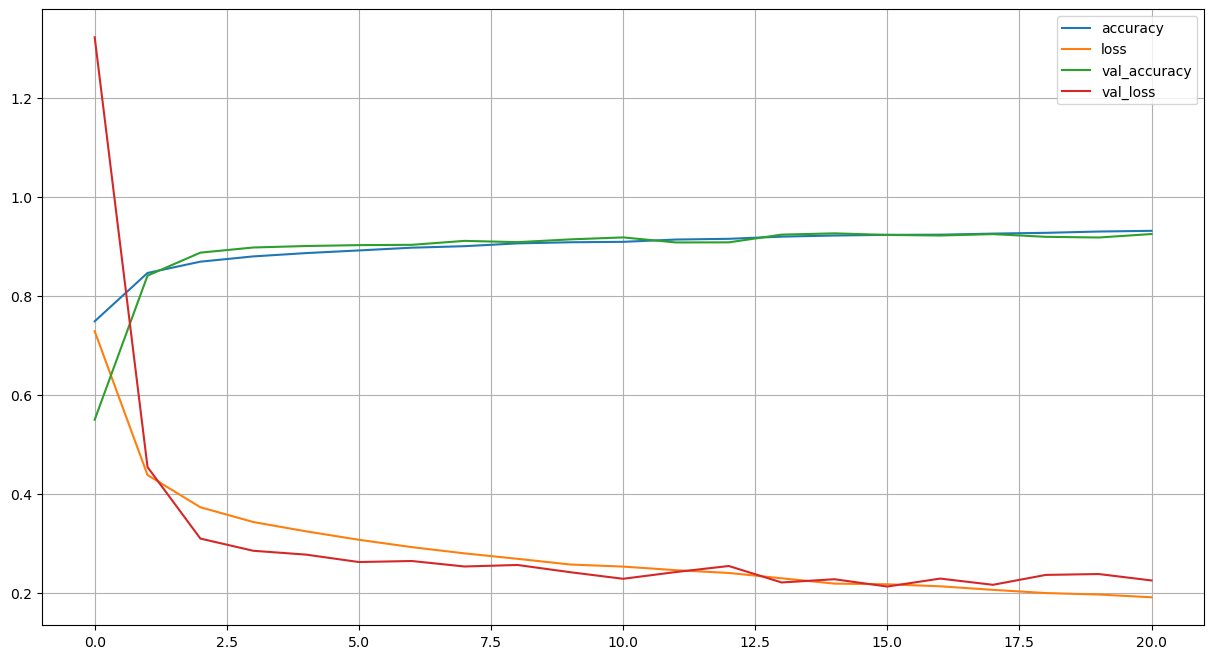

In [749]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(15, 8))
plt.grid(True)
plt.show()

In [750]:
#Si quisiéramos seguir entrenando usando nuestro conjunto de validación
#history2 = model.fit(X_train,train_labels,epochs=15,batch_size=128,validation_data=(X_validation,validation_labels),initial_epoch= 10)

In [751]:
#Si quisiéramos ver las curvas de aprendizaje de un segundo entrenamiento
#pd.DataFrame(history2.history).plot(figsize=(15, 8))
#plt.grid(True)
#plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
#plt.show()

# Evaluación en conjunto de prueba

Estimamos el error de generalización.

In [764]:
test_loss, test_acc = model.evaluate(X_test, test_labels, verbose=0)
print(f'Test accuracy: {test_acc:.2f}')
print(f'Test loss: {test_loss:.2f}')

Test accuracy: 0.92
Test loss: 0.24


# Predicción en nuevos datos

In [753]:
X_new = X_test[:10]

#### Probabilidad estimada por clase

In [754]:
y_proba = model.predict(X_new).round(2)
y_proba

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.17, 0.  , 0.01, 0.  , 0.  , 0.  , 0.82, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ]],
      dtype=float32)

In [755]:
# Convertir probabilidades en clases (el índice de la clase con mayor probabilidad)
y_pred = np.argmax(y_proba, axis=1)

print(y_pred)

[9 2 1 1 6 1 4 6 5 7]


#### Clase con mayor probabilidad

In [756]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt', 'Trouser',
       'Coat', 'Shirt', 'Sandal', 'Sneaker'], dtype='<U11')

In [757]:
print(y_test[:10])

[9 2 1 1 6 1 4 6 5 7]


# Guardar y restaurar el modelo

#### Guardar modelo

In [758]:
model.save('keras_fashion_cnn.keras') #En formato HDF5

#### Restaurar un modelo

In [759]:
model = keras.models.load_model('keras_fashion_cnn.keras')

In [760]:
X_new = X_test[:5] # pretend these are new instances
y_pred = model.predict(X_new)
y_pred.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.17, 0.  , 0.01, 0.  , 0.  , 0.  , 0.82, 0.  , 0.  , 0.  ]],
      dtype=float32)

1. Modifica el modelo par alcanzar un accuracy mayor al 92% pero evitando que suceda el sobreajuste.
2. En lugar de la red personalizada, utiliza un arquitectura de red más compleja como ResNet o VGG.

### Arquitectura VGG

In [765]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam

# Cargar el dataset fashion_mnist
(X_train, y_train), (X_test, y_test) = datasets.fashion_mnist.load_data()

# Preprocesar los datos
# Redimensionamos las imágenes a (28, 28, 1) para que sean imágenes en escala de grises
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Convertir las etiquetas en formato one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


# Redimensionar las imágenes a (224, 224, 3) para que se ajusten a VGG16
X_train_vgg = tf.image.resize(X_train, (32, 32))
X_test_vgg = tf.image.resize(X_test, (32, 32))

X_train_vgg = tf.image.grayscale_to_rgb(X_train_vgg)
X_test_vgg = tf.image.grayscale_to_rgb(X_test_vgg)


# Cargar el modelo VGG16 preentrenado en ImageNet, sin las capas superiores
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32,3))

# Congelar las capas convolucionales de VGG16
vgg_base.trainable = False

# Crear el modelo agregando capas adicionales
model_vgg = models.Sequential([
    vgg_base,  # Usamos las capas convolucionales preentrenadas de VGG16
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')  # 10 clases en Fashion MNIST
])

# Compilar el modelo
model_vgg.compile(optimizer=Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Resumen del modelo
model_vgg.summary()



Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 1, 1, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_27 (Flatten)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_92 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,748,170 (56.26 MB)

 Trainable params: 33,482 (130.79 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [766]:
# Entrenar el modelo
history_vgg = model_vgg.fit(X_train_vgg, y_train, epochs=10, batch_size=64, validation_split=0.3, verbose=1)

Epoch 1/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 55s 83ms/step - accuracy: 0.3008 - loss: 2.0008 - val_accuracy: 0.7288 - val_loss: 1.0189
Epoch 2/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 56s 85ms/step - accuracy: 0.6338 - loss: 1.1121 - val_accuracy: 0.7623 - val_loss: 0.7655
Epoch 3/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 57s 87ms/step - accuracy: 0.6947 - loss: 0.9068 - val_accuracy: 0.7790 - val_loss: 0.6741
Epoch 4/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 58s 88ms/step - accuracy: 0.7262 - loss: 0.8118 - val_accuracy: 0.7925 - val_loss: 0.6263
Epoch 5/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 58s 88ms/step - accuracy: 0.7416 - loss: 0.7580 - val_accuracy: 0.7983 - val_loss: 0.5940
Epoch 6/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 58s 89ms/step - accuracy: 0.7597 - loss: 0.7101 - val_accuracy: 0.8050 - val_loss: 0.5679
Epoch 7/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 58s 89ms/step - accuracy: 0.7716 - loss: 0.6714 - val_accuracy: 0.8092 - val_loss: 0.5483
Epoch 8/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 59s 89ms/step - accuracy: 0.7750 - loss: 0.6570 - 

In [768]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model_vgg.evaluate(X_test_vgg, y_test, verbose=0)
print(f'Accuracy en el conjunto de prueba: {test_acc:.2f}')
print(f'Loss en el conjunto de prueba: {test_loss:.2f}')

Accuracy en el conjunto de prueba: 0.82
Loss en el conjunto de prueba: 0.52


# Comparacion de modelo personalizado y modelo VGG

Al entrenar un modelo CNN personalizado para predecir el dataset Fashion MNIST, logré una precisión de 92% tras 20 épocas, y el entrenamiento tomó aprox. 6 minutos. Al compararlo con una red VGG, esta última alcanzó una precisión de 82% en 10 épocas, pero el entrenamiento se prolongó durante 10 minutos. Las diferencias son las siguientes:

1. **Complejidad del modelo**. La red VGG tiene una cantidad significativamente mayor de parámetros en comparación con mi modelo CNN, lo que provoca un aumento considerable en el tiempo de procesamiento por cada época. Este incremento en complejidad estructural hace que la red VGG sea mucho más exigente en términos de recursos computacionales.

2. **Resultados**. Dado que cuento con recursos computacionales limitados, no puedo aprovechar al máximo el potencial del modelo VGG. Para obtener un rendimiento superior, esta red requiere más tiempo y recursos que no están disponibles, lo que significa que, bajo estas limitaciones, mi modelo CNN logra un desempeño competitivo en menos tiempo.

3. **Entrada de los modelos**. Las imágenes del dataset Fashion MNIST son de 28x28 píxeles, mientras que la red VGG requiere un tamaño mínimo de 32x32 píxeles. Esto implica que tuve que redimensionar las imágenes, lo que podría haber afectado el rendimiento de la red VGG durante el entrenamiento, introduciendo un posible sesgo que no estaba presente en mi modelo CNN.